In [1]:
import numpy as np

# Load the data from the .npz file
data = np.load('point_cloud_sampled.npz')
points = data['points']  # Shape: (num_samples, 3)
colors = data['colors']  # Shape: (num_samples, 3)

print(f"Loaded {points.shape[0]} points.")


Loaded 1000000 points.


In [3]:
import numpy as np

# Load the data
data = np.load('point_cloud_sampled.npz')
points = data['points']  # Shape: (num_samples, 3)
colors = data['colors']  # Shape: (num_samples, 3)

# Apply coordinate transformation
points_transformed = points.copy()
points_transformed[:, 0] = points[:, 0]         # X remains the same
points_transformed[:, 1] = points[:, 2]         # Y_new = Z_original
points_transformed[:, 2] = -points[:, 1]        # Z_new = -Y_original

# Now use points_transformed in your visualization and when passing to NeRF Studio


In [4]:
import open3d as o3d
import numpy as np

# Ensure colors are within [0,1]
colors = np.clip(colors, 0.0, 1.0)

# Create an Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Save the point cloud as a PLY file
o3d.io.write_point_cloud('point_cloud_sampled.ply', pcd)
print("Point cloud saved as 'point_cloud_sampled.ply'")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Point cloud saved as 'point_cloud_sampled.ply'


In [5]:
!pip install plyfile


Defaulting to user installation because normal site-packages is not writeable


In [6]:
from plyfile import PlyData, PlyElement
import numpy as np

# Convert colors to uint8 and scale to [0,255] if necessary
colors_uint8 = (np.clip(colors, 0.0, 1.0) * 255).astype(np.uint8)

# Create a structured array
vertex_data = np.array(
    list(
        zip(
            points[:, 0], points[:, 1], points[:, 2],
            colors_uint8[:, 0], colors_uint8[:, 1], colors_uint8[:, 2]
        )
    ),
    dtype=[
        ('x', 'f4'), ('y', 'f4'), ('z', 'f4'),
        ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')
    ]
)

# Create a PlyElement
ply_element = PlyElement.describe(vertex_data, 'vertex')

# Write to PLY file
PlyData([ply_element]).write('point_cloud_sampled.ply')
print("Point cloud saved as 'point_cloud_sampled.ply'")


Point cloud saved as 'point_cloud_sampled.ply'


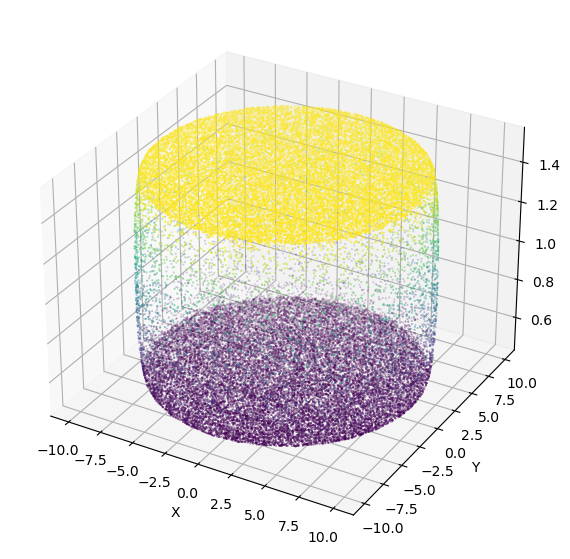

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Load the data
data = np.load('point_cloud_sampled.npz')
points = data['points']
colors = data['colors']

# Downsample for visualization
max_points = 50_000  # Adjust the number of points to display (e.g., 50,000)
if points.shape[0] > max_points:
    idx = np.random.choice(points.shape[0], max_points, replace=False)
    points = points[idx]
    colors = colors[idx]

# Normalize colors to [0, 1]
colors = np.clip(colors, 0.0, 1.0)

# Option 1: Map to a custom color (e.g., map to a colormap)
# You can create a color map based on one of the axes (e.g., z-axis)
norm = plt.Normalize(vmin=np.min(points[:, 2]), vmax=np.max(points[:, 2]))
cmap = plt.get_cmap('viridis')  # Change colormap here (e.g., 'plasma', 'inferno')
mapped_colors = cmap(norm(points[:, 2]))

# Option 2: You can also replace the colors with a specific color, for example:
# mapped_colors = np.tile([1.0, 0.0, 0.0], (points.shape[0], 1))  # All red color

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot points with new colors
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=mapped_colors, s=0.1)

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [1]:
import numpy as np

# Load the data
data = np.load('point_cloud_sampled.npz')
points = data['points']  # Shape: (num_samples, 3)
colors = data['colors']  # Shape: (num_samples, 3)


In [2]:
# Swap Y and Z axes and invert the new Z-axis
points_transformed = points.copy()
points_transformed[:, 0] = points[:, 0]         # X remains the same
points_transformed[:, 1] = points[:, 2]         # Y_new = Z_original
points_transformed[:, 2] = -points[:, 1]        # Z_new = -Y_original

# Update points
points = points_transformed


In [3]:
import torch

# Convert to PyTorch tensors
points_tensor = torch.from_numpy(points).float().cuda()
colors_tensor = torch.from_numpy(colors).float().cuda()

# Ensure colors are within [0, 1]
colors_tensor = torch.clamp(colors_tensor, 0.0, 1.0)


In [4]:
seed_points = (points_tensor, colors_tensor)


In [5]:
from splatfacto_model import SplatfactoModel, SplatfactoModelConfig

config = SplatfactoModelConfig(
    random_init=False,  # We're providing our own points
    sh_degree=0,        # Use color only, adjust as needed
    background_color="black",  # Set background color
    # Add other configurations if needed
)


ModuleNotFoundError: No module named 'splatfacto_model'

In [11]:
import numpy as np
import torch
import os

# Correct data path
data_path = 'D:\\ASCC_parts_extended\\point_cloud_sampled.npz'

# Check if file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"File not found at {data_path}")

# Load the data
data = np.load(data_path)
print("Arrays in the npz file:", data.files)

# Ensure required arrays are present
required_keys = ['points', 'normals', 'colors']
for key in required_keys:
    if key not in data:
        raise KeyError(f"'{key}' is not a file in the archive")

# Extract data
sampled_points = data['points']       # Shape: (N, 3)
sampled_normals = data['normals']     # Shape: (N, 3)
sampled_colors = data['colors']       # Shape: (N, 3)



Arrays in the npz file: ['points', 'normals', 'colors']


In [12]:
# Adjust coordinate system from Blender to Nerfstudio (Y-up)
points = sampled_points.copy()
points[:, [1, 2]] = points[:, [2, 1]]  # Swap Y and Z
points[:, 2] = -points[:, 2]           # Invert Z

normals = sampled_normals.copy()
normals[:, [1, 2]] = normals[:, [2, 1]]  # Swap Y and Z
normals[:, 2] = -normals[:, 2]           # Invert Z


In [13]:
# Convert to torch tensors
means = torch.from_numpy(points).float()       # [N, 3]
normals = torch.from_numpy(normals).float()    # [N, 3]
colors = torch.from_numpy(sampled_colors).float()  # [N, 3]
colors = torch.clamp(colors, 0.0, 1.0)             # Ensure colors are in [0, 1]


In [14]:
def normals_to_quaternions(normals):
    # Reference vector (Z-axis in Nerfstudio coordinate system)
    ref_vector = torch.tensor([0, 0, 1], dtype=torch.float32)
    ref_vector = ref_vector.unsqueeze(0)  # [1, 3]

    normals = normals / normals.norm(dim=1, keepdim=True)  # Normalize normals
    dot_product = (ref_vector * normals).sum(dim=1)
    axis = torch.cross(ref_vector.expand_as(normals), normals)
    axis = axis / (axis.norm(dim=1, keepdim=True) + 1e-8)
    angle = torch.acos(torch.clamp(dot_product, -1.0, 1.0))

    half_angle = angle / 2
    sin_half_angle = torch.sin(half_angle)
    cos_half_angle = torch.cos(half_angle)

    quats = torch.zeros(normals.shape[0], 4)
    quats[:, 0] = cos_half_angle
    quats[:, 1:] = sin_half_angle.unsqueeze(1) * axis

    return quats

# Compute quaternions
quats = normals_to_quaternions(normals)  # [N, 4]


In [16]:
from sklearn.neighbors import NearestNeighbors

def compute_scales(points, k=10):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(points)
    distances, _ = nbrs.kneighbors(points)
    avg_dist = distances[:, 1:].mean(axis=1)
    scales = avg_dist
    return scales

# Compute scales
scales_values = compute_scales(points, k=10)  # 'points' is a NumPy array
scales = torch.from_numpy(scales_values).float().unsqueeze(1).repeat(1, 3)  # [N, 3]
scales = torch.log(scales)  # Scales are stored in log-space


In [2]:
from gsplat.rendering import rasterization

In [4]:
import numpy as np
import torch

# Step 1: Load the data from the .npz file
input_file = r"C:\Users\abhilash.durgam\Documents\ascc_parts\gaussian_splatting_data.npz"
data = np.load(input_file)

# Step 2: Convert the loaded data into PyTorch tensors
means_crop = torch.tensor(data['points'], dtype=torch.float32)
quats_crop = torch.tensor(data['quats'], dtype=torch.float32)
scales_crop = torch.tensor(data['scales'], dtype=torch.float32)
colors_crop = torch.tensor(data['colors'], dtype=torch.float32)
opacities_crop = torch.tensor(data['opacities'], dtype=torch.float32)
viewmat = torch.tensor(data['viewmats'], dtype=torch.float32)  # View matrices
K = torch.tensor(data['Ks'], dtype=torch.float32)  # Intrinsic camera parameters

# Step 3: Extract other rendering parameters
W = data['width'].item()  # Image width
H = data['height'].item()  # Image height
render_mode = "RGB"  # Example render mode, modify as needed
sh_degree_to_use = None  # Modify if needed
near_plane = data['near_plane'].item()
far_plane = data['far_plane'].item()
backgrounds = torch.tensor(data['backgrounds'], dtype=torch.float32)  # Background color

# Step 4: Call the rasterization function with the extracted and converted data
render, alpha, self_info = rasterization(
    means=means_crop,
    quats=quats_crop,  # rasterization does normalization internally
    scales=torch.exp(scales_crop),  # Apply exponential to the scales as per your function
    opacities=torch.sigmoid(opacities_crop).squeeze(-1),
    colors=colors_crop,
    viewmats=viewmat,  # [1, 4, 4]
    Ks=K,  # [1, 3, 3]
    width=W,
    height=H,
    packed=False,
    near_plane=near_plane,
    far_plane=far_plane,
    render_mode=render_mode,
    sh_degree=sh_degree_to_use,
    sparse_grad=False,
    absgrad=False,  # Example value, modify as needed
    rasterize_mode="classic",  # Example value, modify as needed
    # radius_clip=3.0,  # Uncomment and modify if needed
)

# Output rendered result (you can modify this as per your workflow)
print("Rendered colors: ", render)
print("Rendered alpha: ", alpha)


ImportError: DLL load failed while importing gsplat_cuda: The specified module could not be found.